# Mesh Generation in Numpy Pt. 2 - Application

([<matplotlib.axis.YTick at 0x7f16eda8ada0>,
 <a list of 2 Text yticklabel objects>)

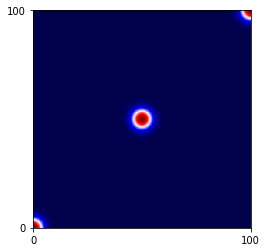

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

def generate_grid(xdim, ydim):
    x = np.linspace(*xdim)
    y = np.linspace(*ydim)
    
    xx, yy = np.meshgrid(x, y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    return grid

def generate_coordinates():
    coordinates_as_array = np.array([0.0, 0.0, 50.0, 50.0 , 100.0, 100.0])
    coordinates_as_xy_pair = coordinates_as_array.reshape(-1, 2)
    
    return coordinates_as_xy_pair

def evaluate_density_functions_on_grid(grid, coordinates):
    normal_distributions_at_given_coordinates = [multivariate_normal(coordinate, cov=10) for coordinate in coordinates]
    evaluated_density_functions_on_grid = [distribution.pdf(grid) for distribution in normal_distributions_at_given_coordinates]
    
    return evaluated_density_functions_on_grid

grid_x_resolution = 500
grid_y_resolution = 500
xdim = (0, 100, grid_x_resolution)
ydim = (0, 100, grid_y_resolution)

grid = generate_grid(xdim=xdim, ydim=ydim)
coordinates = generate_coordinates()
evaluated_density_functions_on_grid = evaluate_density_functions_on_grid(grid, coordinates)

summed_density_functions = np.sum(np.vstack(evaluated_density_functions_on_grid), axis=0)
summed_density_functions = summed_density_functions.reshape(grid_x_resolution, grid_y_resolution)

plt.imshow(summed_density_functions, origin="lower", cmap="seismic")
plt.xticks([xdim[0], grid_x_resolution], [xdim[0], xdim[1]])
plt.yticks([ydim[0], grid_y_resolution], [ydim[0], ydim[1]])